In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

df = pd.read_csv('../data/AirPassengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.columns = ['ds', 'y']

In [2]:
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


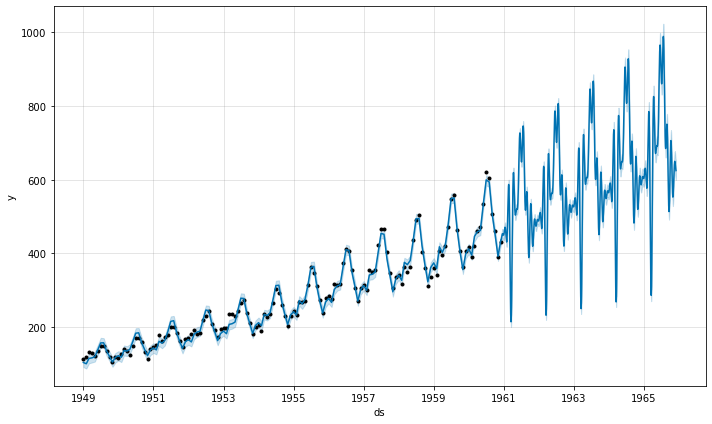

In [3]:
model = Prophet(seasonality_mode='multiplicative')
model.fit(df)
future = model.make_future_dataframe(periods=365 * 5)
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


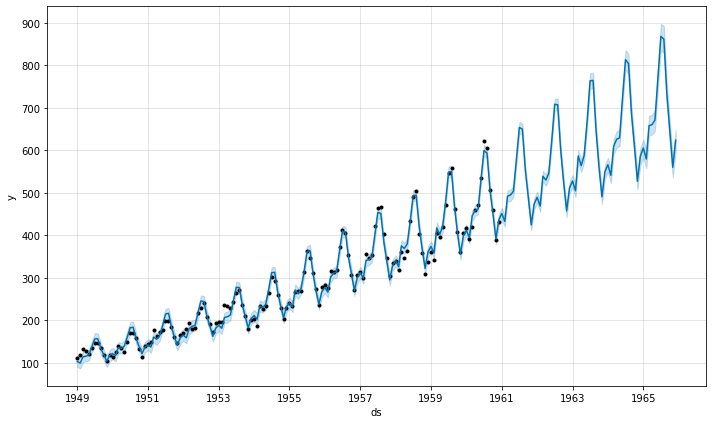

In [4]:
model = Prophet(seasonality_mode='multiplicative')
model.fit(df)
future = model.make_future_dataframe(periods=12 * 5, freq='MS')
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()

In [5]:
df = pd.read_csv('../data/divvy_hourly.csv')
df['date'] = pd.to_datetime(df['date'])
df.columns = ['ds', 'y']

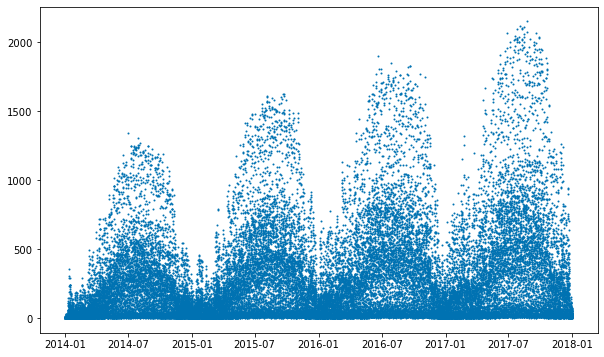

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(x=df['ds'], y=df['y'], s=1, c='#0072B2')
plt.show()

In [7]:
model = Prophet(seasonality_mode='multiplicative')
model.fit(df)
future = model.make_future_dataframe(periods=365 * 24, freq='h')

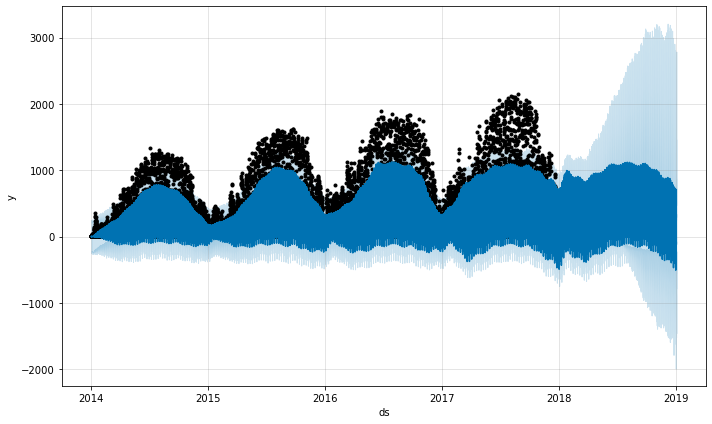

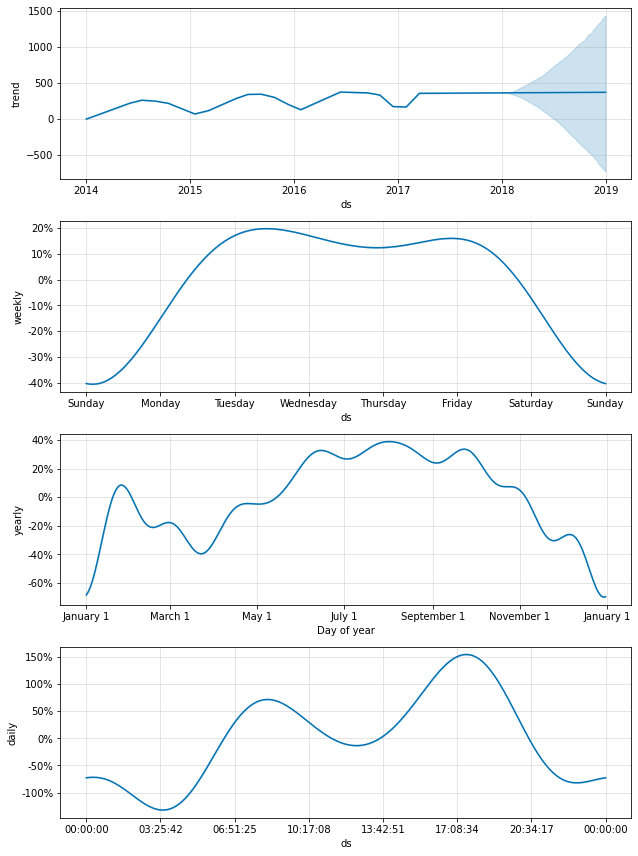

In [8]:
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()
fig2 = model.plot_components(forecast)
plt.show()

In [9]:
df = df[(df['ds'].dt.hour >= 8) & (df['ds'].dt.hour < 18)]

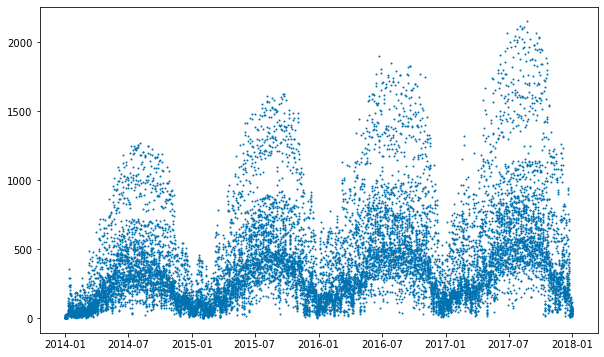

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(x=df['ds'], y=df['y'], s=1, c='#0072B2')
plt.show()

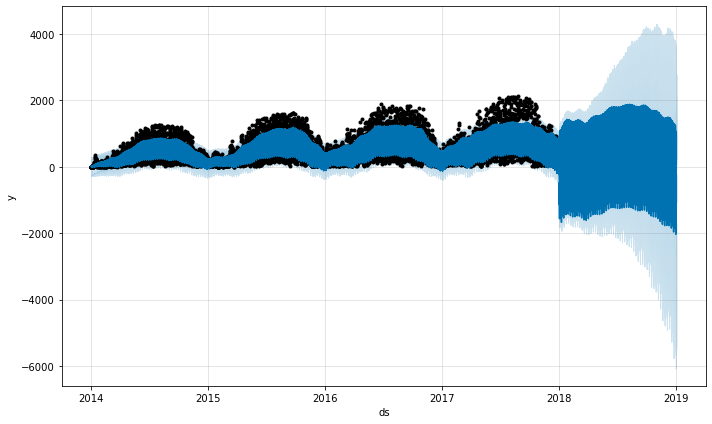

In [11]:
model = Prophet(seasonality_mode='multiplicative')
model.fit(df)
future = model.make_future_dataframe(periods=365 * 24, freq='h')
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()

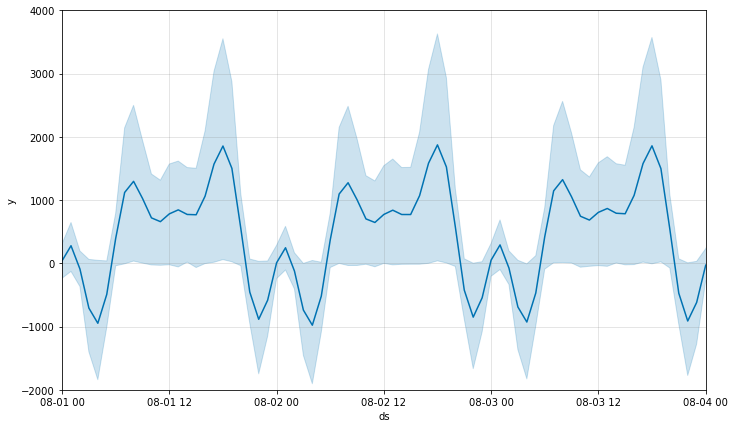

In [12]:
fig = model.plot(forecast)
plt.xlim(pd.to_datetime(['2018-08-01', '2018-08-04']))
plt.ylim(-2000, 4000)
plt.show()

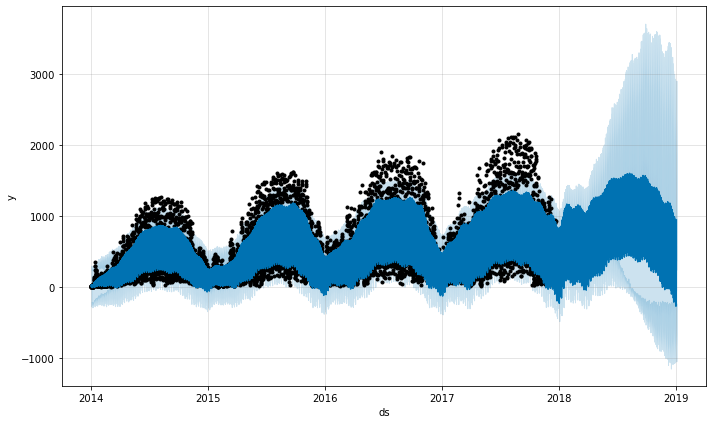

In [13]:
future2 = future[(future['ds'].dt.hour >= 8) &
                 (future['ds'].dt.hour < 18)]
forecast2 = model.predict(future2)
fig = model.plot(forecast2)
plt.show()

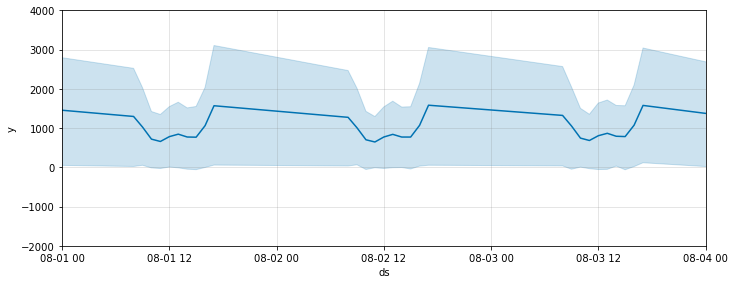

In [14]:
fig = model.plot(forecast2, figsize=(10, 4))
plt.xlim(pd.to_datetime(['2018-08-01', '2018-08-04']))
plt.ylim(-2000, 4000)
plt.show()

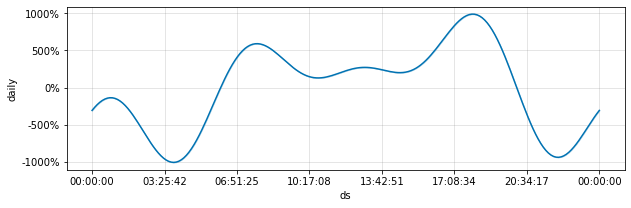

In [15]:
from fbprophet.plot import plot_seasonality
plot_seasonality(model, 'daily', figsize=(10, 3))
plt.show()